YouTube per-CPU CGroup residency analysis (with eas 1.2)
=======================
This is a run of top-of-tree Wahoo


In [1]:
#!/usr/bin/env python
%pylab inline
import trappy
from trace import Trace
import logging
import pandas as pd
import numpy as np
import os

from conf import LisaLogging
LisaLogging.setup(level=logging.ERROR)
logging.info('#### Setup FTrace')
path_to_html = "/home/joelaf/repo/lisa-aosp/external/lisa/results/YouTube_eas12_4.4.56-g3a99b558e8c2/trace.html"

Populating the interactive namespace from numpy and matplotlib


In [2]:
tr = Trace(None, path_to_html,
           cgroup_info = { 
               'cgroups': ['foreground', 'background', 'system-background', 'top-app', 'rt'],
               'controller_ids': { 4: 'cpuset', 2: 'schedtune' }
           },
           events=[ 'sched_switch', 'cgroup_attach_task_devlib', 'cgroup_attach_task', 'sched_process_fork' ],
           normalize_time=False)

Total amount of time spent per Cgroup (schedtune)
===========================
(NaN is the idle task)

In [3]:
tr.data_frame.cpu_residencies_cgroup('schedtune')

,cpu_0,cpu_1,cpu_2,cpu_3,cpu_4,cpu_5,cpu_6,cpu_7,total
schedtune,,,,,,,,,
background,0.114796,0.157250,0.005520,0.008088,0.000000,0.000000,0.670740,0.000047,0.956441
foreground,3.046883,3.017969,1.439542,0.896851,0.583559,0.102979,0.498291,0.406533,9.992607
root,5.689420,2.013840,2.423268,1.490792,0.447084,0.242111,1.951480,0.661130,14.919125
top-app,0.343027,0.168558,0.092193,0.065982,3.795301,2.377549,1.082070,0.311982,8.236662
NaN,22.470572,26.290126,27.694096,29.197009,26.842616,28.934865,27.941294,30.257805,219.628383


Plot per-CPU breakdown without considering idle time
------------------------------------------------------------

/home/joelaf/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


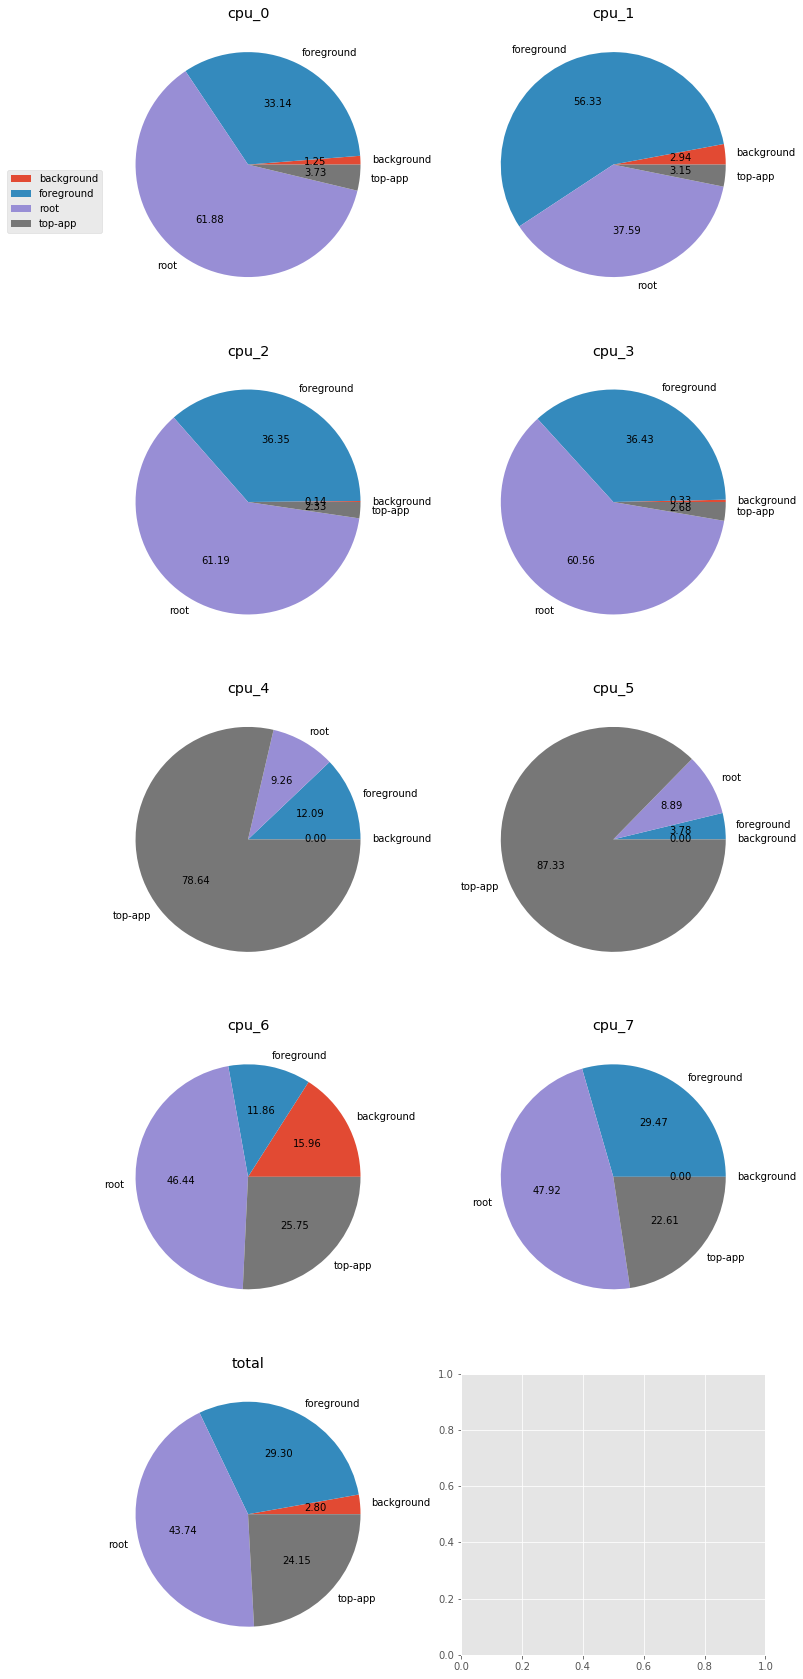

In [4]:
tr.analysis.residency.plot_cgroup('schedtune', idle=False)

Plot per-CPU breakdown WITH considering idle time (yellow slice)
------------------------------------------------------------

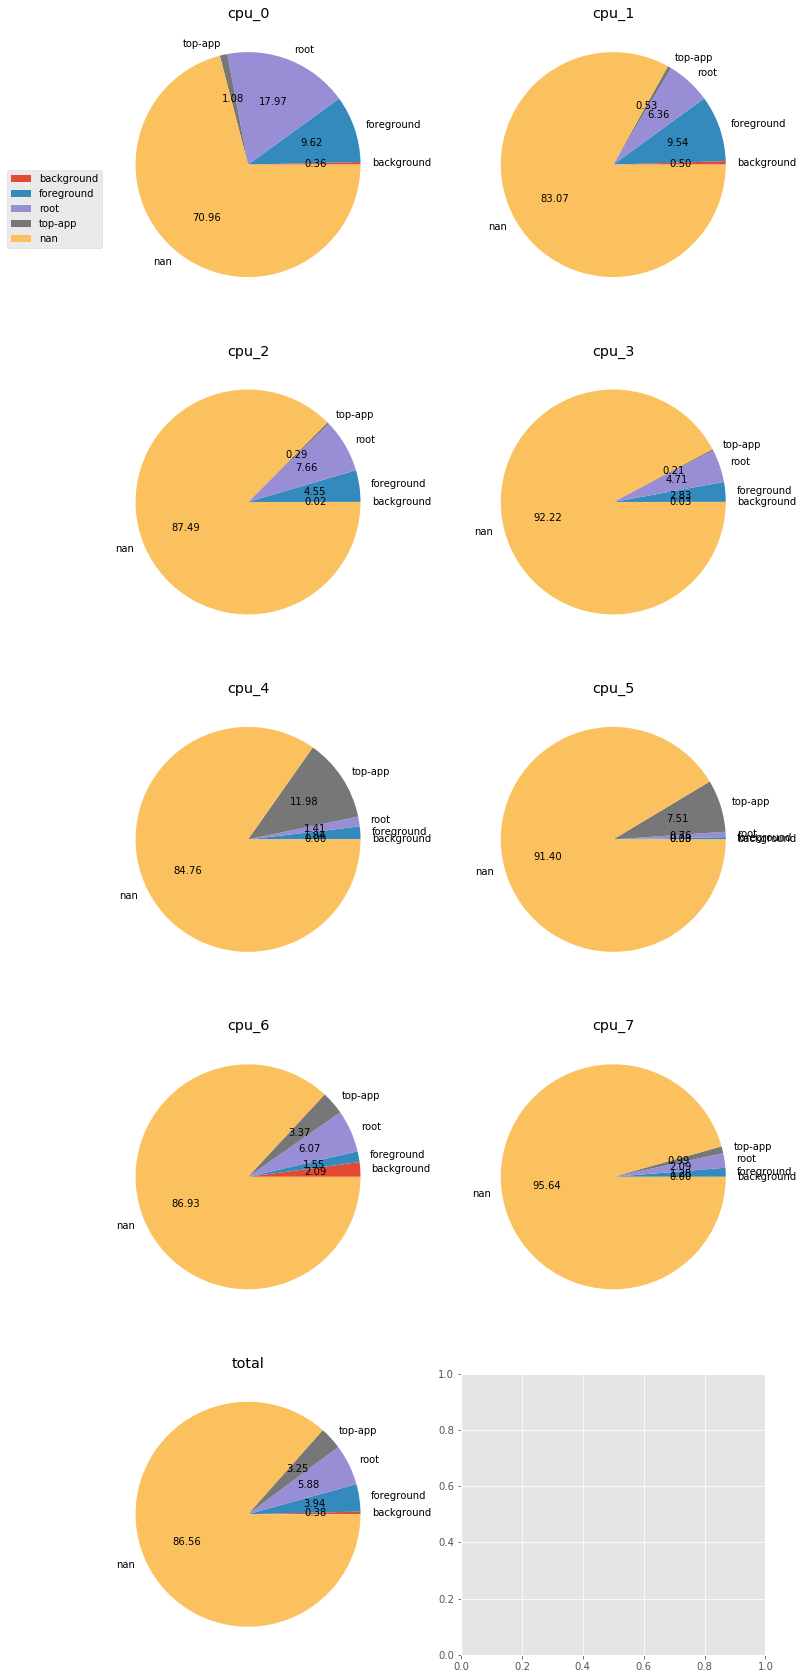

In [5]:
tr.analysis.residency.plot_cgroup('schedtune', idle=True)

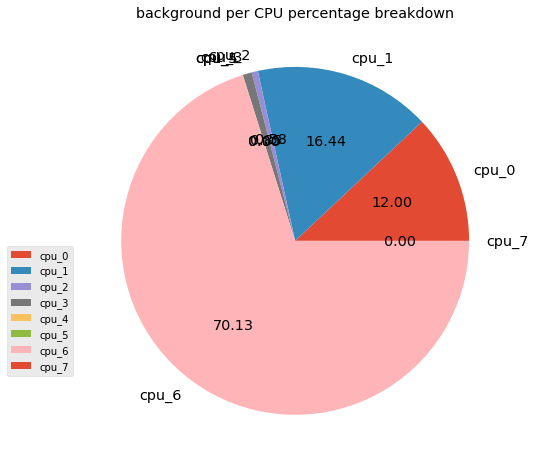

In [6]:
tr.analysis.residency.plot_cgroup('schedtune', cgroup='background')

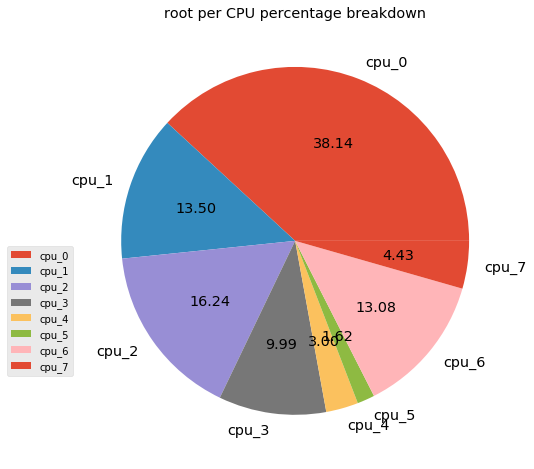

In [7]:
tr.analysis.residency.plot_cgroup('schedtune', cgroup='root')

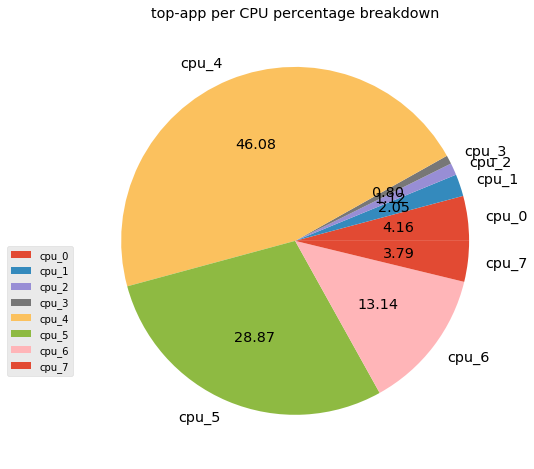

In [8]:
tr.analysis.residency.plot_cgroup('schedtune', cgroup='top-app')

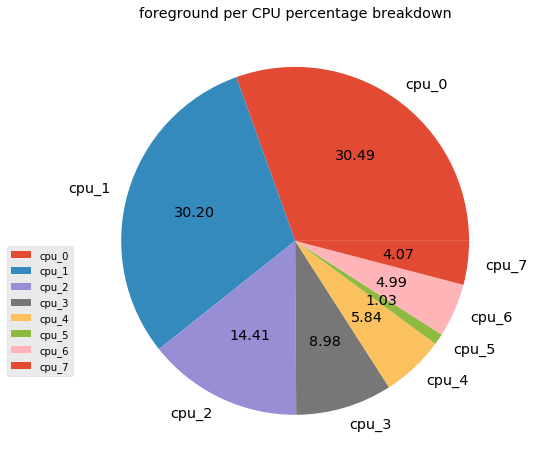

In [9]:
tr.analysis.residency.plot_cgroup('schedtune', cgroup='foreground')

Conclusions
-------------
* root CGroup ran considerably less on core 6 (7.5% to 2.6%) and slightly less on core 7 so there's definitely improvement with tasks that are not assigned to any CGroup with this patch stack
* Background group still runs on the big cores